In this notebook, I will fill in the NULL values of the given dataset and then check for and fix any outliers.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('data.csv', header=0)
df.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Spending Score,Edu level,No Of Family members,DOB,Owns Vehicle
0,Douglas,Male,97308,6.945,TRUE,Marketing,39.0,1.0,2.0,04-11-1995,Yes
1,Thomas,Male,61933,4.17,TRUE,NaN,81.0,4.0,5.0,01-08-1994,NaN
2,Maria,Female,130590,11.858,FALSE,Finance,6.0,5.0,3.0,14-10-2018,NaN
3,Jerry,Male,138705,9.34,TRUE,Finance,77.0,2.0,3.0,18-05-1993,NaN
4,Larry,Male,101004,1.389,&&&&&&,Client Services,40.0,4.0,6.0,28-02-1986,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First Name            100 non-null    object 
 1   Gender                80 non-null     object 
 2   Salary                98 non-null     object 
 3   Bonus %               98 non-null     object 
 4   Senior Management     92 non-null     object 
 5   Team                  93 non-null     object 
 6   Spending Score        95 non-null     float64
 7   Edu level             97 non-null     float64
 8   No Of Family members  96 non-null     float64
 9   DOB                   98 non-null     object 
 10  Owns Vehicle          36 non-null     object 
dtypes: float64(3), object(8)
memory usage: 8.7+ KB


In [4]:
print(df.isna().sum())
print('\nTotal Null Values:',df.isna().sum().sum())

First Name               0
Gender                  20
Salary                   2
Bonus %                  2
Senior Management        8
Team                     7
Spending Score           5
Edu level                3
No Of Family members     4
DOB                      2
Owns Vehicle            64
dtype: int64

Total Null Values: 117


#### On checking the data, it's found that we have some cells with grabage values like "&&&&&&" and "######". Removing these values

In [5]:
garbage = ['&&&&&&', '######']
df = pd.read_csv('data.csv', header=0, na_values = garbage)
df.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Spending Score,Edu level,No Of Family members,DOB,Owns Vehicle
0,Douglas,Male,97308.0,6.945,True,Marketing,39.0,1.0,2.0,04-11-1995,Yes
1,Thomas,Male,61933.0,4.170,True,NaN,81.0,4.0,5.0,01-08-1994,NaN
2,Maria,Female,130590.0,11.858,False,Finance,6.0,5.0,3.0,14-10-2018,NaN
3,Jerry,Male,138705.0,9.340,True,Finance,77.0,2.0,3.0,18-05-1993,NaN
4,Larry,Male,101004.0,1.389,NaN,Client Services,40.0,4.0,6.0,28-02-1986,NaN


In [6]:
print(df.isna().sum())
print('\nTotal Null Values:',df.isna().sum().sum())

First Name               0
Gender                  22
Salary                   7
Bonus %                  3
Senior Management        9
Team                    10
Spending Score           5
Edu level                3
No Of Family members     4
DOB                      2
Owns Vehicle            64
dtype: int64

Total Null Values: 129


#### So we have total 129 NaN values.

In [7]:
#More than 50% of values missing, hence droping 'Owns Vehicle' column.

df.drop(columns='Owns Vehicle', inplace=True)
df.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Spending Score,Edu level,No Of Family members,DOB
0,Douglas,Male,97308.0,6.945,True,Marketing,39.0,1.0,2.0,04-11-1995
1,Thomas,Male,61933.0,4.170,True,NaN,81.0,4.0,5.0,01-08-1994
2,Maria,Female,130590.0,11.858,False,Finance,6.0,5.0,3.0,14-10-2018
3,Jerry,Male,138705.0,9.340,True,Finance,77.0,2.0,3.0,18-05-1993
4,Larry,Male,101004.0,1.389,NaN,Client Services,40.0,4.0,6.0,28-02-1986


#### Checking 'DOB' column as it has less than 5% missing values.

In [8]:
df[df['DOB'].isna()]

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Spending Score,Edu level,No Of Family members,DOB
61,Denise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Catherene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Since all the values in these rows are missing, we can drop these rows.

df.drop(df[df['DOB'].isna()].index, inplace=True)

In [10]:
# Checking Null Values

print(df.isna().sum())
print('\nTotal Null Values:',df.isna().sum().sum())

First Name               0
Gender                  20
Salary                   5
Bonus %                  1
Senior Management        7
Team                     8
Spending Score           3
Edu level                1
No Of Family members     2
DOB                      0
dtype: int64

Total Null Values: 47


#### Filling the categorical columns, 'Gender', 'Team', 'Senior Management', and 'Edu level' with it's mode value.

In [11]:
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)
df['Team'].fillna(value=df['Team'].mode()[0], inplace=True)
df['Senior Management'].fillna(value=df['Senior Management'].mode()[0], inplace=True)
df['Edu level'].fillna(value=df['Edu level'].mode()[0], inplace=True)
df['No Of Family members'].fillna(value=df['No Of Family members'].mode()[0], inplace=True)
df.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Spending Score,Edu level,No Of Family members,DOB
0,Douglas,Male,97308.0,6.945,True,Marketing,39.0,1.0,2.0,04-11-1995
1,Thomas,Male,61933.0,4.170,True,Client Services,81.0,4.0,5.0,01-08-1994
2,Maria,Female,130590.0,11.858,False,Finance,6.0,5.0,3.0,14-10-2018
3,Jerry,Male,138705.0,9.340,True,Finance,77.0,2.0,3.0,18-05-1993
4,Larry,Male,101004.0,1.389,True,Client Services,40.0,4.0,6.0,28-02-1986


#### Filling the nominal columns, 'Salary', 'Bonus%', and 'Spending Score' with it's mean value.

In [12]:
df['Salary'].fillna(value= df['Salary'].mean(), inplace=True)
df['Bonus %'].fillna(value= df['Bonus %'].mean(), inplace=True)
df['Spending Score'].fillna(value= df['Spending Score'].mean(), inplace=True)
df[['Salary','Bonus %', 'Spending Score']].isna().sum()

Salary            0
Bonus %           0
Spending Score    0
dtype: int64

#### Checking for null values

In [13]:
print(df.isna().sum())
print('\nTotal Null Values:',df.isna().sum().sum())

First Name              0
Gender                  0
Salary                  0
Bonus %                 0
Senior Management       0
Team                    0
Spending Score          0
Edu level               0
No Of Family members    0
DOB                     0
dtype: int64

Total Null Values: 0


## Checking for Outliers

In [14]:
df.dtypes

First Name               object
Gender                   object
Salary                  float64
Bonus %                 float64
Senior Management          bool
Team                     object
Spending Score          float64
Edu level               float64
No Of Family members    float64
DOB                      object
dtype: object

#### Making box plot for nominal columns.

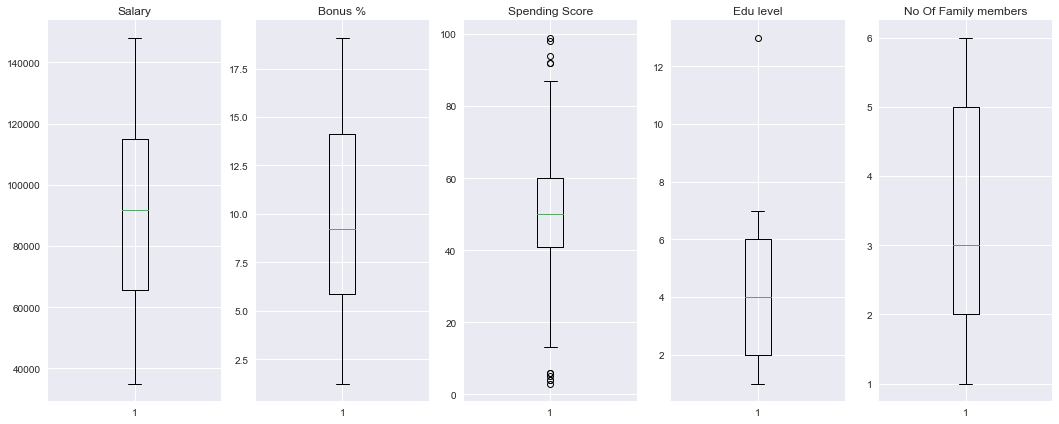

In [15]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1, 5,figsize=(18,7))

boxlist = ['Salary', 'Bonus %', 'Spending Score', 'Edu level', 'No Of Family members']

for i in range(len(boxlist)):
    axes[i].boxplot(df[boxlist[i]])
    axes[i].set_title(boxlist[i])

#### -- We have outliers in 'Spending Score' and 'Edu level'

#### Calculating Interquartile Range

In [16]:
outliers = ['Spending Score', 'Edu level']

Q1 = df[outliers].quantile(0.25)
Q3 = df[outliers].quantile(0.75)
IQR = Q3 - Q1
IQR

Spending Score    19.0
Edu level          4.0
dtype: float64

In [17]:
#to check outlier if true means outlier false means not outlier
(df[outliers] < (Q1 - 1.5 * IQR)) | (df[outliers] > (Q3 + 1.5 * IQR))

,Spending Score,Edu level
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


In [18]:
df[outliers].skew()

Spending Score   -0.112665
Edu level         0.579186
dtype: float64

In [19]:
#quantile based flooring and capping
#replacing with 10th quartile for lower end and with 90th quartile with higher end
df[outliers] = np.where(df[outliers] < df[outliers].quantile(0.1), df[outliers].quantile(0.1),df[outliers])
df[outliers] = np.where(df[outliers] > df[outliers].quantile(0.9), df[outliers].quantile(0.9),df[outliers])
df[outliers].skew()

Spending Score   -0.289180
Edu level         0.047542
dtype: float64

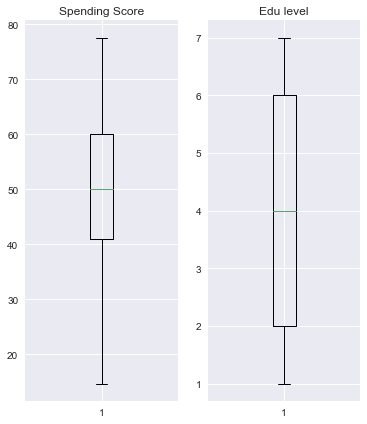

In [20]:
fig, axes = plt.subplots(1, 2,figsize=(6,7))

for i in range(len(outliers)):
    axes[i].boxplot(df[outliers[i]])
    axes[i].set_title(outliers[i])

In [25]:
df.reset_index(inplace=True)
df

,level_0,index,First Name,Gender,Salary,Bonus %,Senior Management,Team,Spending Score,Edu level,No Of Family members,DOB
0,0,0,Douglas,Male,97308.0,6.945,True,Marketing,39.0,1.0,2.0,04-11-1995
1,1,1,Thomas,Male,61933.0,4.170,True,Client Services,77.6,4.0,5.0,01-08-1994
2,2,2,Maria,Female,130590.0,11.858,False,Finance,14.7,5.0,3.0,14-10-2018
3,3,3,Jerry,Male,138705.0,9.340,True,Finance,77.0,2.0,3.0,18-05-1993
4,4,4,Larry,Male,101004.0,1.389,True,Client Services,40.0,4.0,6.0,28-02-1986
...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,95,Heather,Female,43026.0,14.166,False,Client Services,52.0,7.0,3.0,27-01-2011
94,94,96,Cynthia,Female,142321.0,1.737,False,Finance,47.0,3.0,6.0,15-12-2013
95,95,97,Laura,Female,140371.0,10.620,True,Marketing,50.0,2.0,2.0,07-07-2017
96,96,98,Tina,Female,100705.0,16.961,True,Marketing,42.0,6.0,4.0,22-04-1999


Notebook Prepared by **Rahul Fulwadhwa**

LinkedIn - [linkedin.com/in/rahul-fulwadhwa/](https://www.linkedin.com/in/rahul-fulwadhwa/)

Portfolio - [rahuldf.github.io/portfolio](https://rahuldf.github.io/portfolio)